In [1]:
import nltk
import re
nltk.download('gutenberg')

from nltk.corpus import gutenberg

# Download the "blake-poems" and "austen-emma" texts
blake_poems = gutenberg.raw('blake-poems.txt')
austen_emma = gutenberg.raw('austen-emma.txt')

def separate_poem_into_chapters(poem):
    chapters = re.split(r'\n \n(?=[A-Z ]+\n)', blake_poems)
    return chapters[2:]

blake_chapters = separate_poem_into_chapters(blake_poems)

austen_chapters = separate_poem_into_chapters(austen_emma)

[nltk_data] Downloading package gutenberg to /home/saim/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


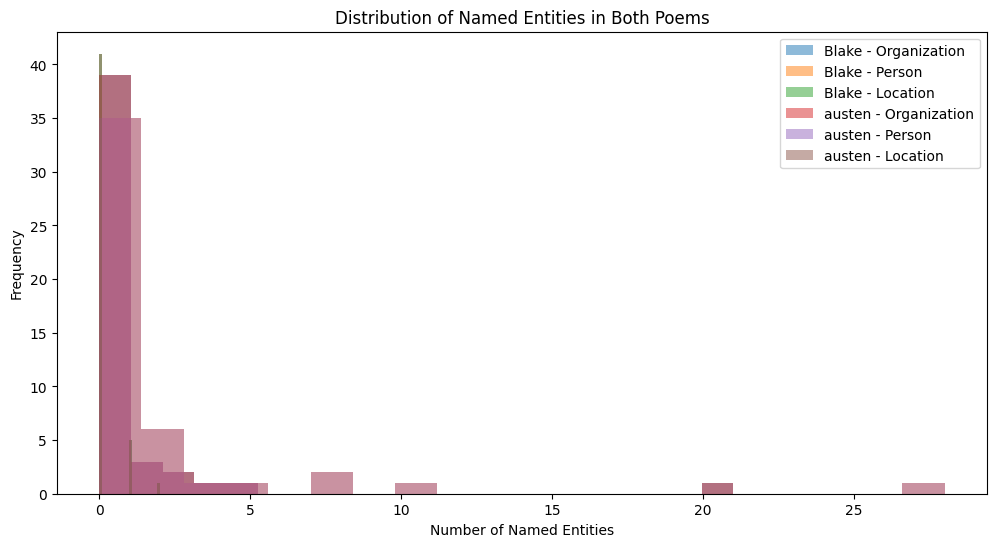

In [3]:
import spacy
import matplotlib.pyplot as plt
# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Define a function to analyze named entities in a given text
def analyze_named_entities(text):
    doc = nlp(text)
    entity_types = {"ORG": 0, "PERSON": 0, "LOC": 0}
    
    for ent in doc.ents:
        if ent.label_ == "ORG":
            entity_types["ORG"] += 1
        elif ent.label_ == "PERSON":
            entity_types["PERSON"] += 1
        elif ent.label_ == "LOC":
            entity_types["LOC"] += 1
    
    return entity_types

blake_entity_counts = []

for chapter in blake_chapters:
    blake_entity_counts.append(analyze_named_entities(chapter))

austen_entity_counts = []

for chapter in austen_chapters:
    austen_entity_counts.append(analyze_named_entities(chapter))

def extract_counts(entity_counts, entity_type):
    return [count[entity_type] for count in entity_counts]

blake_org_counts = extract_counts(blake_entity_counts, "ORG")
blake_person_counts = extract_counts(blake_entity_counts, "PERSON")
blake_loc_counts = extract_counts(blake_entity_counts, "LOC")

austen_org_counts = extract_counts(austen_entity_counts, "ORG")
austen_person_counts = extract_counts(austen_entity_counts, "PERSON")
austen_loc_counts = extract_counts(austen_entity_counts, "LOC")

plt.figure(figsize=(12, 6))
plt.hist(blake_org_counts, bins=20, alpha=0.5, label='Blake - Organization')
plt.hist(blake_person_counts, bins=20, alpha=0.5, label='Blake - Person')
plt.hist(blake_loc_counts, bins=20, alpha=0.5, label='Blake - Location')
plt.hist(austen_org_counts, bins=20, alpha=0.5, label='austen - Organization')
plt.hist(austen_person_counts, bins=20, alpha=0.5, label='austen - Person')
plt.hist(austen_loc_counts, bins=20, alpha=0.5, label='austen - Location')
plt.xlabel('Number of Named Entities')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Named Entities in Both Poems')
plt.show()